In [9]:
# Завдання 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, normalize

# Завантаження даних з CSV файлу (сам файл я скачав з kaggle.com)
data = pd.read_csv('Position_Salaries.csv')
# Використовуємо тільки одну ознаку "Level"
X = data.iloc[:, 1:2].values
# Та що треьба змінна "Salary"
y = data.iloc[:, 2].values 

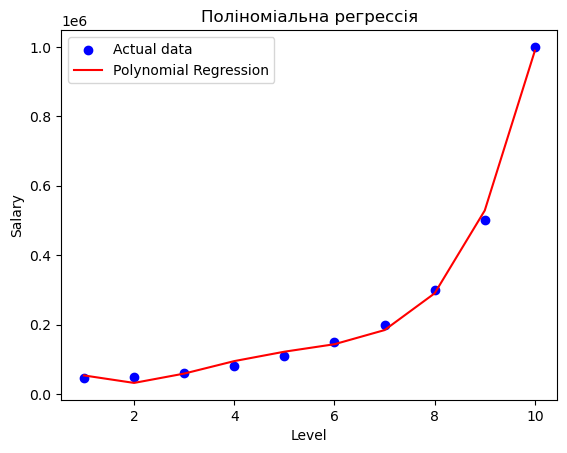

In [10]:
# Будуємо поліноміальні ознаки
poly_features = PolynomialFeatures(degree=4)  # Ви можете змінити степінь полінома тут
X_poly = poly_features.fit_transform(X)

# вчимо модель
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

# Виводим результати
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, poly_regression.predict(X_poly), color='red', label='Polynomial Regression')
plt.title('Поліноміальна регрессія')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [11]:
# Завдання 2 (маємо супер страшний датасет де нічого не підписаной не понятно
# хоча я знайшов його в неті це назви міст (й ще була колонка банд) й злочини що спричинили, 
# но нам це в умові не дається, хоча датасет можна зробити +/- логічним, ми просто його чистим.

In [12]:
# Завантаження даних з файлу
data = pd.read_csv('communities.csv')

# Заміна некоректних значень на NaN
data.replace('?', np.nan, inplace=True)

# Запис очищеного датафрейму у новий файл
data.to_csv('clean_communities.csv', index=False)

In [13]:
# Треба напевно ще їх прибрати... завантаження нових даних з файлу
data = pd.read_csv('clean_communities.csv')

# Вилучення рядків з неповними значеннями
data.dropna(inplace=True)

# Запис очищеного датафрейму у новий файл (на всякий випадок)
data.to_csv('clean_communities_2.csv', index=False)

In [14]:
# Завантаження самих нових даних з CSV файлу
data = pd.read_csv('clean_communities_2.csv')

# Виключення стовпців з текстовими значеннями перед нормалізацією
numeric_data = data.select_dtypes(include=[float, int])

# Використання MinMaxScaler для масштабування діапазону
scaler_minmax = MinMaxScaler()
normalized_data_minmax = scaler_minmax.fit_transform(numeric_data)

In [15]:
# Використання StandardScaler для стандартизації
scaler_standard = StandardScaler()
normalized_data_standard = scaler_standard.fit_transform(numeric_data)

# Використання normalize для нормалізації на основі L2 норми
normalized_data_l2 = normalize(numeric_data, norm='l2')

# Оцінка ефективності методів нормалізації
score_minmax = normalized_data_minmax.mean()
score_standard = normalized_data_standard.mean()
score_l2 = normalized_data_l2.mean()

In [16]:
print("Оцінка масштабування Min-Max:", score_minmax)
print("Оцінка стандартизації:", score_standard)
print("Оцінка нормалізації L2:", score_l2)

Оцінка масштабування Min-Max: 0.3642078759877097
Оцінка стандартизації: -6.322606764653603e-17
Оцінка нормалізації L2: 0.007959139266525521


In [58]:
# метод масштабування Min-Max має найвищу оцінку, а метод стандартизації має найнижчу...